In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_excel("p.xlsx")
(df.head(5))

Saving p.xlsx to p (3).xlsx


,Timestamp,Email Address,Apakah anda bersedia mengisi pertanyaan-pertanyaan berikut ini?,Nama,NPM,Fakultas,Program Studi,Nomer Whatsapp,Berapa gelas kopi yang biasanya kamu konsumsi dalam sehari saat kuliah?,Berapa rupiah rata-rata yang kamu habiskan untuk membeli kopi dalam seminggu sebagai mahasiswa,Berapa jam biasanya kamu bisa bertahan belajar setelah minum kopi?,Berapa kali dalam seminggu kamu nongkrong atau belajar di kafe?,Berapa persen menurutmu kopi membantu meningkatkan fokus belajar (0–100%)?,Bagaimana cara kamu biasanya mendapatkan kopi?,Waktu paling sering kamu minum kopi saat jadi mahasiswa?,Efek utama yang kamu rasakan setelah minum kopi saat belajar?,Di mana tempat favorit kamu minum kopi sambil belajar?,"Menurutmu, ngopi sebagai mahasiswa itu lebih ke arah apa?"
0,2025-09-11 14:20:35.956000,24083010030@student.upnjatim.ac.id,Ya,R. Syailindra Alfarraiel,24083010030,Fakultas Ilmu Komputer,Sains Data,087846270459,1,10000,3,3,0.6,Beli kemasan siap minum,Sebelum berangkat kuliah,Tahan ngantuk,Cafe/warkop,Sekedar kebiasaan
1,2025-09-11 14:21:21.412000,24041010274@student.upnjatim.ac.id,Ya,Farrel,24041010274,Fakultas Ilmu Sosial dan Ilmu Politik,Administrasi Publik,082228857899,2,0,2 Jam,0,0,Bikin sendiri di rumah/kos,Setelah kuliah,Biasa aja,Rumah/kos,Sekedar kebiasaan
2,2025-09-11 14:28:59.663000,24041010218@student.upnjatim.ac.id,Ya,Farivatus Amalia,24041010218,Fakultas Ilmu Sosial dan Ilmu Politik,Administrasi Publik,+6287785705523,1,± 100.000 1 minggu,4 jam,3-5 tergantung,100% 😍😍,Beli di cafe/warung kopi,Saat mengerjakan tugas,Lebih semangat,Cafe/warkop,Sekedar kebiasaan
3,2025-09-11 14:31:32.376000,23081010157@student.upnjatim.ac.id,Ya,Azzahra,23081010157,Fakultas Ilmu Komputer,Informatika,081335485748,1,30000,3,1,0.5,Beli di cafe/warung kopi,Saat mengerjakan tugas,Tahan ngantuk,Cafe/warkop,Kebutuhan wajib menemani mengerjakan tugas
4,2025-09-11 14:47:38.676000,24083010019@student.upnjatim.ac.id,Ya,Hizkia Samhan Rezayoshi,24083010019,Fakultas Ilmu Komputer,Sains Data,081399642665,1,15000,4,1,0.4,Beli di cafe/warung kopi,Saat mengerjakan tugas,Biasa aja,Rumah/kos,Kebutuhan wajib menemani mengerjakan tugas


In [ ]:
import numpy as np
import re

# Data Cleaning

In [ ]:
def clean_cups(value):
    if pd.isna(value): return np.nan
    nums = re.findall(r'\d+', str(value))
    return float(nums[0]) if nums else np.nan

Responden menuliskan jawaban dengan format berbeda, misalnya “2 gelas”, “±3”, atau angka murni. Transformasi dilakukan dengan cara mengekstrak angka dari jawaban tersebut dan mengabaikan teks tambahan. Hasil akhirnya berupa angka jumlah gelas kopi yang dikonsumsi per hari.

In [ ]:
# Pengeluaran per minggu (rupiah)
def clean_spending(value):
    if pd.isna(value): return np.nan
    text = str(value).lower()
    nums = re.findall(r'\d+', text)
    if not nums: return np.nan
    val = (int(nums[0]) + int(nums[-1]))/2 if len(nums) >= 2 else int(nums[0])
    if "ribu" in text or "rb" in text:
        val *= 1000
    return val

Beberapa responden menulis pengeluaran dengan simbol atau teks tambahan, seperti “Rp 30.000”, “±50k”, atau “10000”. Transformasi dilakukan dengan menghapus simbol (Rp, ±, k) serta tanda pemisah ribuan, kemudian mengubahnya menjadi angka. Hasil akhirnya berupa pengeluaran mingguan dalam satuan rupiah.

In [ ]:
# Jam belajar setelah minum kopi
def clean_study_hours(value):
    if pd.isna(value): return np.nan
    nums = re.findall(r'\d+', str(value))
    return float(nums[0]) if nums else np.nan

Data awal berisi jawaban seperti “3 jam”, “±2”, atau rentang “2–4 jam”. Transformasi dilakukan dengan mengambil angka dari jawaban tersebut. Jika jawaban berupa rentang, maka nilai yang dipakai adalah rata-rata. Hasil akhirnya berupa angka jumlah jam belajar per hari.

In [ ]:
def clean_cafe_freq(value):
    if pd.isna(value):
        return np.nan

    text = str(value).lower().strip()

    nums = re.findall(r'\d+', text)
    if nums:
        nums = [float(n) for n in nums]
        return np.mean([nums[0], nums[-1]]) if len(nums) > 1 else nums[0]

    if any(kw in text for kw in ["tidak", "ga", "gak", "nggak", "tergantung"]):
        return 0

    return np.nan

Responden menuliskan jawaban dengan variasi seperti “3 kali”, “1–2 tergantung”, “2x/minggu”, atau “4 kali sebulan”. Transformasi dilakukan dengan cara mengekstrak angka, menghitung rata-rata jika berupa rentang, serta mengonversi satuan bulanan menjadi mingguan (dibagi 4). Hasil akhirnya berupa angka frekuensi kunjungan ke cafe dalam seminggu.

In [ ]:
# Persentase peningkatan fokus
def clean_focus(value):
    if pd.isna(value): return np.nan
    text = str(value).lower()
    nums = re.findall(r'\d+\.?\d*', text)
    if not nums: return np.nan
    val = float(nums[0])
    if "%" in text:
        return val
    if 0 < val <= 1:   # kasus "0.6"
        return val * 100
    return val

Jawaban responden ditulis dengan bentuk seperti “60%”, “100”, atau “±40%”. Transformasi dilakukan dengan menghapus simbol persen maupun teks tambahan, lalu mengubah hasilnya menjadi angka murni. Hasil akhirnya berupa tingkat fokus dalam skala 0–100 persen.

In [ ]:
df["kopi_per_hari"] = df["Berapa gelas kopi yang biasanya kamu konsumsi dalam sehari saat kuliah?"].apply(clean_cups)

df["pengeluaran_kopi_mingguan"] = df["Berapa rupiah rata-rata yang kamu habiskan untuk membeli kopi dalam seminggu sebagai mahasiswa"].apply(clean_spending)

df["jam_belajar_setelah_ngopi"] = df["Berapa jam biasanya kamu bisa bertahan belajar setelah minum kopi?"].apply(clean_study_hours)

df["ke_cafe_per_minggu"] = df["Berapa kali dalam seminggu kamu nongkrong atau belajar di kafe?"].apply(clean_cafe_freq)

df["fokus_persen"] = df["Berapa persen menurutmu kopi membantu meningkatkan fokus belajar (0–100%)?"].apply(clean_focus)

In [ ]:
df = df.drop([
    "Berapa gelas kopi yang biasanya kamu konsumsi dalam sehari saat kuliah?",
    "Berapa rupiah rata-rata yang kamu habiskan untuk membeli kopi dalam seminggu sebagai mahasiswa",
    "Berapa jam biasanya kamu bisa bertahan belajar setelah minum kopi?",
    "Berapa kali dalam seminggu kamu nongkrong atau belajar di kafe?",
    "Berapa persen menurutmu kopi membantu meningkatkan fokus belajar (0–100%)?"
], axis=1)

df.head(10)

,Timestamp,Email Address,Apakah anda bersedia mengisi pertanyaan-pertanyaan berikut ini?,Nama,NPM,Fakultas,Program Studi,Nomer Whatsapp,Bagaimana cara kamu biasanya mendapatkan kopi?,Waktu paling sering kamu minum kopi saat jadi mahasiswa?,Efek utama yang kamu rasakan setelah minum kopi saat belajar?,Di mana tempat favorit kamu minum kopi sambil belajar?,"Menurutmu, ngopi sebagai mahasiswa itu lebih ke arah apa?",kopi_per_hari,pengeluaran_kopi_mingguan,jam_belajar_setelah_ngopi,ke_cafe_per_minggu,fokus_persen
0,2025-09-11 14:20:35.956000,24083010030@student.upnjatim.ac.id,Ya,R. Syailindra Alfarraiel,24083010030,Fakultas Ilmu Komputer,Sains Data,087846270459,Beli kemasan siap minum,Sebelum berangkat kuliah,Tahan ngantuk,Cafe/warkop,Sekedar kebiasaan,1.0,10000.0,3.0,3.0,60.0
1,2025-09-11 14:21:21.412000,24041010274@student.upnjatim.ac.id,Ya,Farrel,24041010274,Fakultas Ilmu Sosial dan Ilmu Politik,Administrasi Publik,082228857899,Bikin sendiri di rumah/kos,Setelah kuliah,Biasa aja,Rumah/kos,Sekedar kebiasaan,2.0,0.0,2.0,0.0,0.0
2,2025-09-11 14:28:59.663000,24041010218@student.upnjatim.ac.id,Ya,Farivatus Amalia,24041010218,Fakultas Ilmu Sosial dan Ilmu Politik,Administrasi Publik,+6287785705523,Beli di cafe/warung kopi,Saat mengerjakan tugas,Lebih semangat,Cafe/warkop,Sekedar kebiasaan,1.0,50.5,4.0,4.0,100.0
3,2025-09-11 14:31:32.376000,23081010157@student.upnjatim.ac.id,Ya,Azzahra,23081010157,Fakultas Ilmu Komputer,Informatika,081335485748,Beli di cafe/warung kopi,Saat mengerjakan tugas,Tahan ngantuk,Cafe/warkop,Kebutuhan wajib menemani mengerjakan tugas,1.0,30000.0,3.0,1.0,50.0
4,2025-09-11 14:47:38.676000,24083010019@student.upnjatim.ac.id,Ya,Hizkia Samhan Rezayoshi,24083010019,Fakultas Ilmu Komputer,Sains Data,081399642665,Beli di cafe/warung kopi,Saat mengerjakan tugas,Biasa aja,Rumah/kos,Kebutuhan wajib menemani mengerjakan tugas,1.0,15000.0,4.0,1.0,40.0
5,2025-09-11 14:50:53.185000,24041010038@student.upnjatim.ac.id,Ya,Difa,-,Fakultas Ilmu Sosial dan Ilmu Politik,Administrasi Publik,-,Beli di cafe/warung kopi,Saat mengerjakan tugas,Tahan ngantuk,Rumah/kos,Kebutuhan wajib menemani mengerjakan tugas,1.0,14000.0,3.0,1.5,70.0
6,2025-09-11 14:52:26.246000,24041010321@student.upnjatim.ac.id,Ya,Kezya,24041010321,Fakultas Ilmu Sosial dan Ilmu Politik,adpub,-,Beli di cafe/warung kopi,Saat mengerjakan tugas,Biasa aja,Rumah/kos,Sekedar kebiasaan,1.0,90000.0,NaN,0.0,30.0
7,2025-09-11 14:53:57.718000,24083010041@student.upnjatim.ac.id,Ya,Sulaiman Abhinaya Praditya,24083010041,Fakultas Ilmu Komputer,Sains Data,082228329816,Beli di cafe/warung kopi,Saat kuliah,Biasa aja,Cafe/warkop,Sekedar kebiasaan,0.0,0.0,1.0,1.0,40.0
8,2025-09-11 15:00:41.035000,24083010094@student.upnjatim.ac.id,Ya,Puri Khairunisa Rahma,24083010094,Fakultas Ilmu Komputer,Sains Data,081332213220,Bikin sendiri di rumah/kos,Sebelum berangkat kuliah,Biasa aja,Rumah/kos,Sekedar kebiasaan,1.0,10000.0,3.0,0.0,60.0
9,2025-09-11 15:11:09.260000,24013010073@student.upnjatim.ac.id,Ya,Denia Nurhalizah,24013010073,Fakultas Ekonomi dan Bisnis,Akuntansi,082264405139,Bikin sendiri di rumah/kos,Saat mengerjakan tugas,Lebih semangat,Cafe/warkop,Kebutuhan wajib menemani mengerjakan tugas,3.0,45000.0,10.0,3.0,85.0


Dengan transformasi ini, seluruh data numerik yang sebelumnya bercampur dengan teks dan simbol sudah konsisten berbentuk angka. Dataset pun siap digunakan untuk analisis statistik maupun pemodelan.

## Outlier

In [ ]:
numeric_candidates = [
    "Berapa gelas kopi yang biasanya kamu konsumsi dalam sehari saat kuliah?",
    "Berapa rupiah rata-rata yang kamu habiskan untuk membeli kopi dalam seminggu sebagai mahasiswa",
    "Berapa jam biasanya kamu bisa bertahan belajar setelah minum kopi?",
    "Berapa kali dalam seminggu kamu nongkrong atau belajar di kafe?",
    "Berapa persen menurutmu kopi membantu meningkatkan fokus belajar (0–100%)?"
]

In [ ]:
print(df.dtypes)

Timestamp                                                           object
Email Address                                                       object
Apakah anda bersedia mengisi pertanyaan-pertanyaan berikut ini?     object
Nama                                                                object
NPM                                                                 object
Fakultas                                                            object
Program Studi                                                       object
Nomer Whatsapp                                                      object
Bagaimana cara kamu biasanya mendapatkan kopi?                      object
Waktu paling sering kamu minum kopi saat jadi mahasiswa?            object
Efek utama yang kamu rasakan setelah minum kopi saat belajar?       object
Di mana tempat favorit kamu minum kopi sambil belajar?              object
Menurutmu, ngopi sebagai mahasiswa itu lebih ke arah apa?           object
kopi_per_hari            

In [ ]:
import pandas as pd
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

def detect_outliers_iqr(series):
    series = series.dropna()
    if len(series) == 0:
        return pd.Series(dtype=float), None, None

    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers, lower, upper

def detect_outliers_zscore(series, threshold=3):
    series = series.dropna()
    if len(series) == 0:
        return pd.Series(dtype=float), None, None

    mean = series.mean()
    std = series.std()

    # Hindari pembagian nol (kalau datanya konstan)
    if std == 0 or np.isnan(std):
        return pd.Series(dtype=float), None, None

    lower = mean - threshold * std
    upper = mean + threshold * std
    outliers = series[(series < lower) | (series > upper)]
    return outliers, lower, upper

# --- Analisis untuk semua kolom numerik ---
outlier_summary = []

for col in num_cols:
    outliers_iqr, lower_iqr, upper_iqr = detect_outliers_iqr(df[col])
    outliers_z, lower_z, upper_z = detect_outliers_zscore(df[col])

    total_nonnull = len(df[col].dropna())

    outlier_summary.append({
        "Kolom": col,
        "Jumlah Outlier (IQR)": len(outliers_iqr),
        "Jumlah Outlier (Z-Score)": len(outliers_z),
        "Persentase Outlier (IQR)": (len(outliers_iqr)/total_nonnull)*100 if total_nonnull>0 else None,
        "Persentase Outlier (Z-Score)": (len(outliers_z)/total_nonnull)*100 if total_nonnull>0 else None
    })

# --- Output lebih rapi ---
outlier_df = pd.DataFrame(outlier_summary)

# Bulatkan persentase
outlier_df["Persentase Outlier (IQR)"] = outlier_df["Persentase Outlier (IQR)"].round(2)
outlier_df["Persentase Outlier (Z-Score)"] = outlier_df["Persentase Outlier (Z-Score)"].round(2)

# Urutkan dari kolom dengan outlier terbanyak (berdasarkan IQR)
outlier_df = outlier_df.sort_values(by="Jumlah Outlier (IQR)", ascending=False)

# Reset index biar rapi
outlier_df = outlier_df.reset_index(drop=True)

print("\n===== HASIL DETEKSI OUTLIER =====")
print(outlier_df.to_string(index=False))



===== HASIL DETEKSI OUTLIER =====
                    Kolom  Jumlah Outlier (IQR)  Jumlah Outlier (Z-Score)  Persentase Outlier (IQR)  Persentase Outlier (Z-Score)
            kopi_per_hari                    47                         2                     29.94                          1.27
pengeluaran_kopi_mingguan                    14                         4                      8.59                          2.45
jam_belajar_setelah_ngopi                     4                         2                      2.70                          1.35
       ke_cafe_per_minggu                     2                         2                      1.25                          1.25
             fokus_persen                     0                         0                      0.00                          0.00


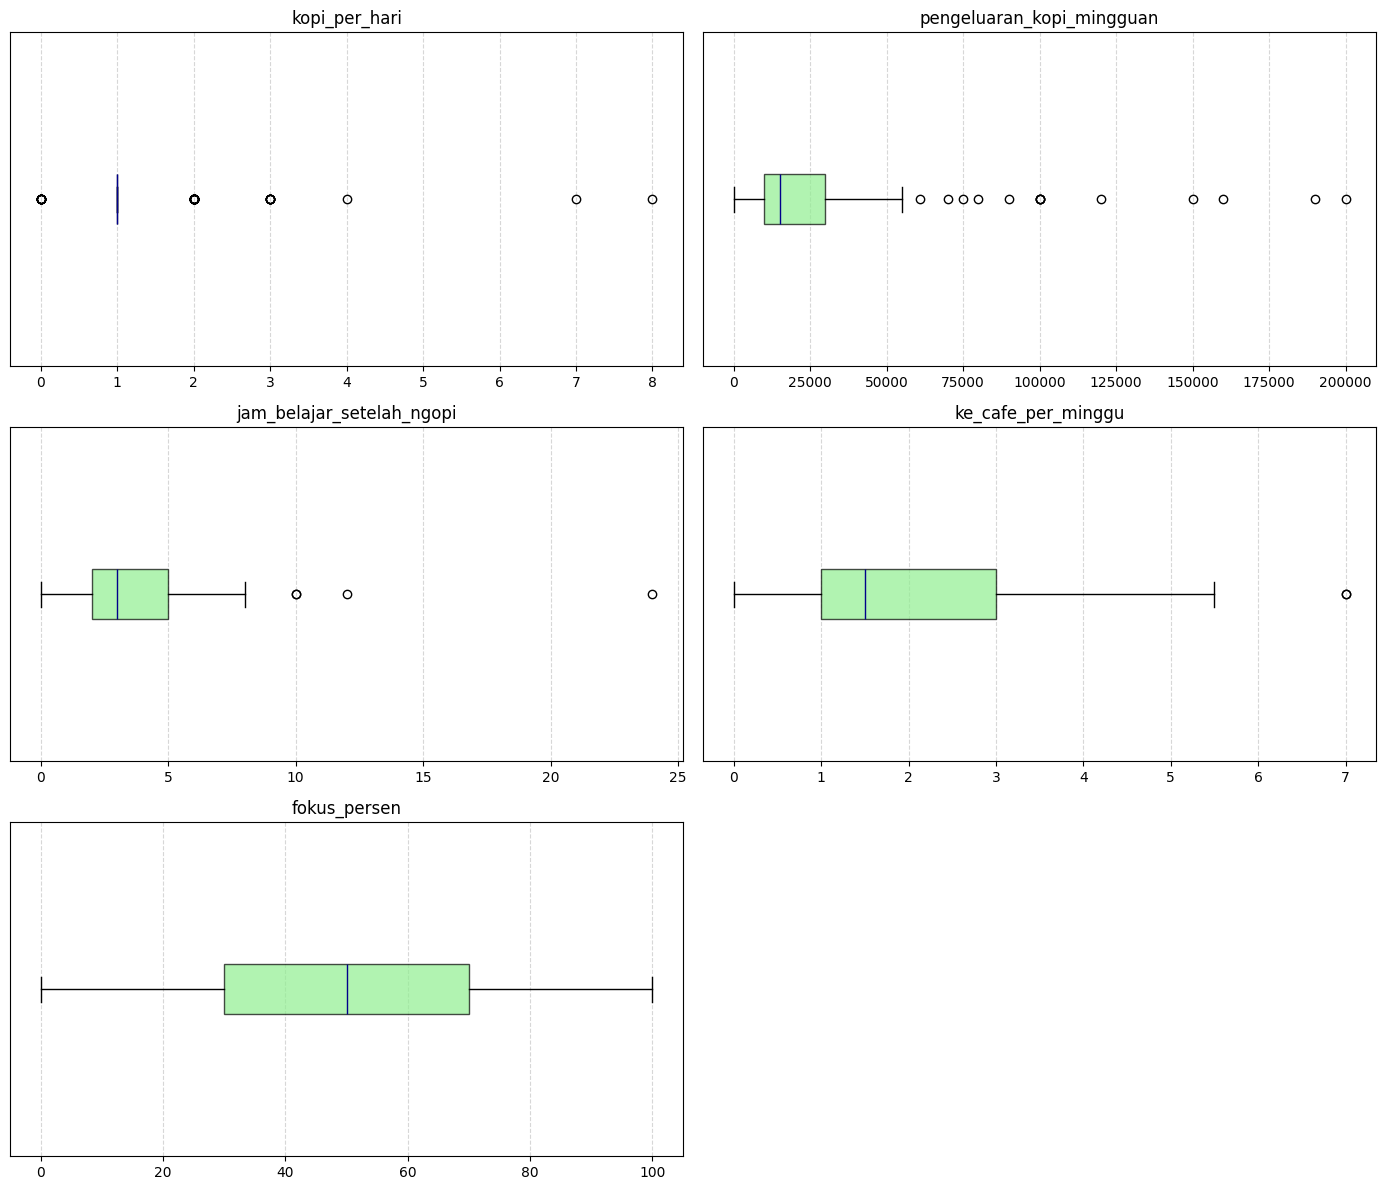

In [ ]:
import matplotlib.pyplot as plt
import math

n = len(num_cols)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))

for idx, col in enumerate(num_cols):
    r = idx // cols
    c = idx % cols
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.boxplot(df[col].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor='lightgreen', alpha=0.7),
               medianprops=dict(color='darkblue'))
    ax.set_title(f"{col}")
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.set_yticks([])

# Kosongkan subplot yang tidak terpakai
for j in range(idx+1, rows * cols):
    r = j // cols
    c = j % cols
    axes[r, c].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def cap_outliers(series, method="iqr", threshold=3):
    if method == "iqr":
        _, lower, upper = detect_outliers_iqr(series)
    else:
        _, lower, upper = detect_outliers_zscore(series, threshold)

    return np.where(series < lower, lower,
           np.where(series > upper, upper, series))

# Copy dataset
df_capped = df.copy()

for col in num_cols:
    df_capped[col] = cap_outliers(df[col], method="iqr")  # default pakai IQR


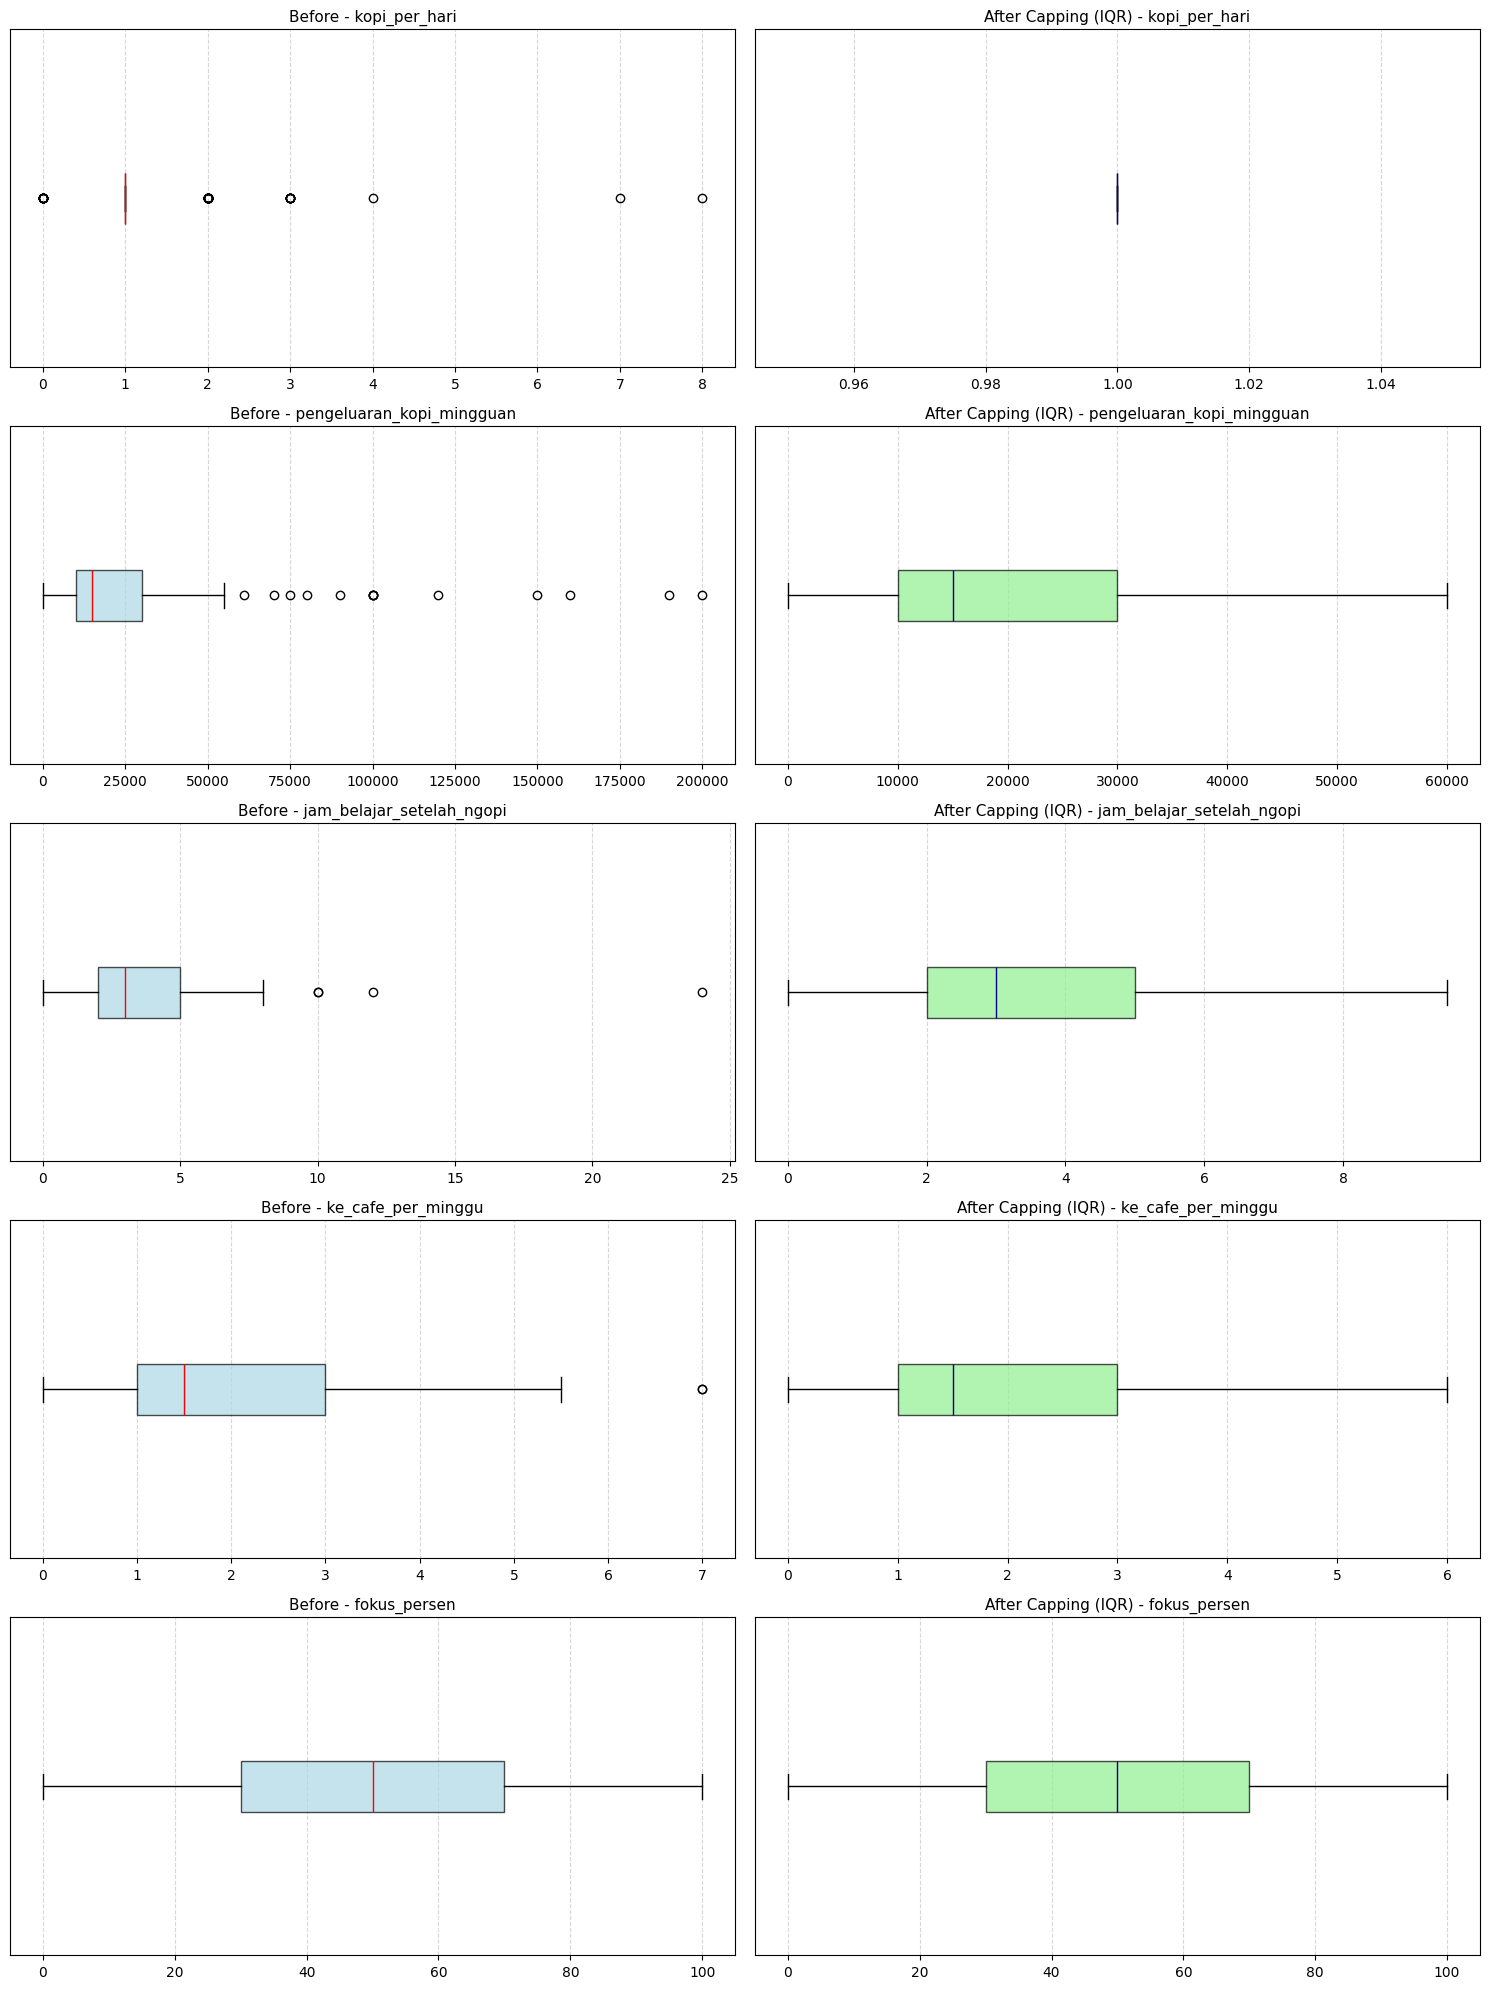

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(num_cols), 2, figsize=(15, 4*len(num_cols)))

for i, col in enumerate(num_cols):
    # Before
    axes[i, 0].boxplot(
        df[col].dropna(), vert=False, patch_artist=True,
        boxprops=dict(facecolor='lightblue', alpha=0.7),
        medianprops=dict(color='red')
    )
    axes[i, 0].set_title(f"Before - {col}", fontsize=11)
    axes[i, 0].grid(axis='x', linestyle='--', alpha=0.5)
    axes[i, 0].set_yticks([])

    # After
    axes[i, 1].boxplot(
        df_capped[col].dropna(), vert=False, patch_artist=True,
        boxprops=dict(facecolor='lightgreen', alpha=0.7),
        medianprops=dict(color='darkblue')
    )
    axes[i, 1].set_title(f"After Capping (IQR) - {col}", fontsize=11)
    axes[i, 1].grid(axis='x', linestyle='--', alpha=0.5)
    axes[i, 1].set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
# --- Definisi fungsi count_outliers ---
def count_outliers(series, method="iqr"):
    series = series.dropna()
    if method == "iqr":
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return len(series[(series < lower) | (series > upper)])
    else:
        raise ValueError("Method not supported yet")

# --- Buat tabel ringkasan horizontal (IQR) ---
summary_dict = {"Metric": [
    "Jumlah Outlier Sebelum (IQR)",
    "Jumlah Outlier Sesudah (IQR)",
    "Total Data",
    "Persentase Sebelum (%)",
    "Persentase Sesudah (%)"
]}

for col in num_cols:
    before = count_outliers(df[col], method="iqr")
    after  = count_outliers(df_capped[col], method="iqr")
    total  = len(df[col].dropna())

    summary_dict[col] = [
        before,
        after,
        total,
        round(100 * before / total, 2) if total > 0 else None,
        round(100 * after / total, 2) if total > 0 else None
    ]

outlier_check_wide = pd.DataFrame(summary_dict).set_index("Metric")

print("\n===== RINGKASAN OUTLIER (IQR) - SEBELUM vs SESUDAH CAPPING =====\n")
print(outlier_check_wide.to_string(justify='center'))



===== RINGKASAN OUTLIER (IQR) - SEBELUM vs SESUDAH CAPPING =====

                              kopi_per_hari  pengeluaran_kopi_mingguan  jam_belajar_setelah_ngopi  ke_cafe_per_minggu  fokus_persen
Metric                                                                                                                             
Jumlah Outlier Sebelum (IQR)      47.00                14.00                        4.0                    2.00              0.0   
Jumlah Outlier Sesudah (IQR)       0.00                 0.00                        0.0                    0.00              0.0   
Total Data                       157.00               163.00                      148.0                  160.00            164.0   
Persentase Sebelum (%)            29.94                 8.59                        2.7                    1.25              0.0   
Persentase Sesudah (%)             0.00                 0.00                        0.0                    0.00              0.0   


# Drop Variabel Tidak Relevan

In [ ]:
cols_to_drop = [
    "Timestamp",
    "Email Address",
    "Apakah anda bersedia mengisi pertanyaan-pertanyaan berikut ini?",
    "Nama",
    "NPM",
    "Nomer Whatsapp"
]

df_cleaned = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
df_cleaned.head(10)

,Fakultas,Program Studi,Bagaimana cara kamu biasanya mendapatkan kopi?,Waktu paling sering kamu minum kopi saat jadi mahasiswa?,Efek utama yang kamu rasakan setelah minum kopi saat belajar?,Di mana tempat favorit kamu minum kopi sambil belajar?,"Menurutmu, ngopi sebagai mahasiswa itu lebih ke arah apa?",kopi_per_hari,pengeluaran_kopi_mingguan,jam_belajar_setelah_ngopi,ke_cafe_per_minggu,fokus_persen
0,Fakultas Ilmu Komputer,Sains Data,Beli kemasan siap minum,Sebelum berangkat kuliah,Tahan ngantuk,Cafe/warkop,Sekedar kebiasaan,1.0,10000.0,3.0,3.0,60.0
1,Fakultas Ilmu Sosial dan Ilmu Politik,Administrasi Publik,Bikin sendiri di rumah/kos,Setelah kuliah,Biasa aja,Rumah/kos,Sekedar kebiasaan,2.0,0.0,2.0,0.0,0.0
2,Fakultas Ilmu Sosial dan Ilmu Politik,Administrasi Publik,Beli di cafe/warung kopi,Saat mengerjakan tugas,Lebih semangat,Cafe/warkop,Sekedar kebiasaan,1.0,50.5,4.0,4.0,100.0
3,Fakultas Ilmu Komputer,Informatika,Beli di cafe/warung kopi,Saat mengerjakan tugas,Tahan ngantuk,Cafe/warkop,Kebutuhan wajib menemani mengerjakan tugas,1.0,30000.0,3.0,1.0,50.0
4,Fakultas Ilmu Komputer,Sains Data,Beli di cafe/warung kopi,Saat mengerjakan tugas,Biasa aja,Rumah/kos,Kebutuhan wajib menemani mengerjakan tugas,1.0,15000.0,4.0,1.0,40.0
5,Fakultas Ilmu Sosial dan Ilmu Politik,Administrasi Publik,Beli di cafe/warung kopi,Saat mengerjakan tugas,Tahan ngantuk,Rumah/kos,Kebutuhan wajib menemani mengerjakan tugas,1.0,14000.0,3.0,1.5,70.0
6,Fakultas Ilmu Sosial dan Ilmu Politik,adpub,Beli di cafe/warung kopi,Saat mengerjakan tugas,Biasa aja,Rumah/kos,Sekedar kebiasaan,1.0,90000.0,NaN,0.0,30.0
7,Fakultas Ilmu Komputer,Sains Data,Beli di cafe/warung kopi,Saat kuliah,Biasa aja,Cafe/warkop,Sekedar kebiasaan,0.0,0.0,1.0,1.0,40.0
8,Fakultas Ilmu Komputer,Sains Data,Bikin sendiri di rumah/kos,Sebelum berangkat kuliah,Biasa aja,Rumah/kos,Sekedar kebiasaan,1.0,10000.0,3.0,0.0,60.0
9,Fakultas Ekonomi dan Bisnis,Akuntansi,Bikin sendiri di rumah/kos,Saat mengerjakan tugas,Lebih semangat,Cafe/warkop,Kebutuhan wajib menemani mengerjakan tugas,3.0,45000.0,10.0,3.0,85.0


# Visualisasi Kategori

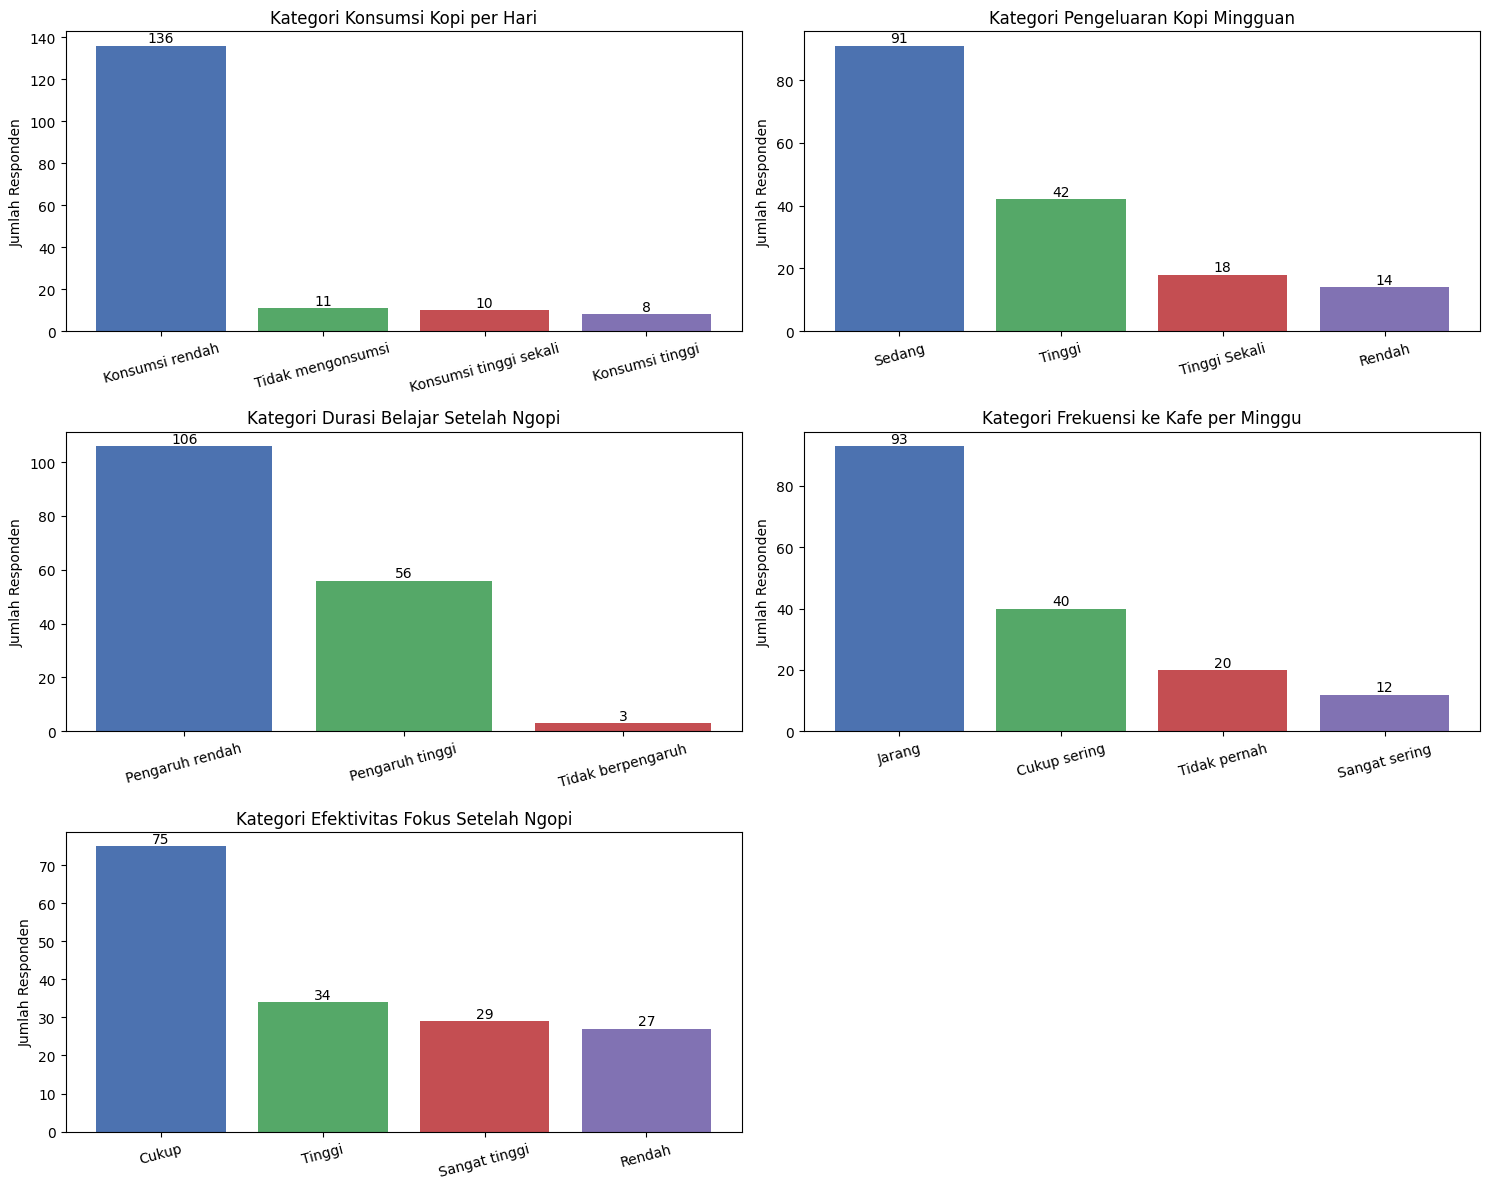

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# === Fungsi kategorisasi formal ===
def kategori_kopi_per_hari(x):
    if x == 0: return "Tidak mengonsumsi"
    elif 1 <= x <= 2: return "Konsumsi rendah"
    elif 3 <= x <= 4: return "Konsumsi tinggi"
    else: return "Konsumsi tinggi sekali"

def kategori_pengeluaran(x):
    if x < 5000: return "Rendah"
    elif 5000 <= x <= 20000: return "Sedang"
    elif 20000 < x <= 50000: return "Tinggi"
    else: return "Tinggi Sekali"

def kategori_jam_belajar(x):
    if x < 1: return "Tidak berpengaruh"
    elif 1 <= x <= 4: return "Pengaruh rendah"
    else: return "Pengaruh tinggi"

def kategori_ke_cafe(x):
    if x == 0: return "Tidak pernah"
    elif 1 <= x <= 2: return "Jarang"
    elif 3 <= x <= 5: return "Cukup sering"
    else: return "Sangat sering"

def kategori_fokus(x):
    if x <= 25: return "Rendah"
    elif 26 <= x <= 50: return "Cukup"
    elif 51 <= x <= 75: return "Tinggi"
    else: return "Sangat tinggi"

# === List visualisasi ===
visuals = [
    ("kopi_per_hari", kategori_kopi_per_hari, "Kategori Konsumsi Kopi per Hari"),
    ("pengeluaran_kopi_mingguan", kategori_pengeluaran, "Kategori Pengeluaran Kopi Mingguan"),
    ("jam_belajar_setelah_ngopi", kategori_jam_belajar, "Kategori Durasi Belajar Setelah Ngopi"),
    ("ke_cafe_per_minggu", kategori_ke_cafe, "Kategori Frekuensi ke Kafe per Minggu"),
    ("fokus_persen", kategori_fokus, "Kategori Efektivitas Fokus Setelah Ngopi"),
]

# === Setup Grid ===
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Warna netral profesional
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B3"]  # biru, hijau, merah soft, ungu netral

# === Plot Loop ===
for ax, (col, func, title) in zip(axes, visuals):
    data = df_cleaned[col].apply(func).value_counts()
    bars = ax.bar(data.index, data.values, color=colors[:len(data)])

    # Tambah angka di atas bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(int(height)),
                ha="center", va="bottom", fontsize=10)

    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Jumlah Responden")
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=15)

# Kosongkan jika ada slot sisa
if len(axes) > len(visuals):
    axes[-1].axis("off")

plt.tight_layout()
plt.show()

Variabel-variabel numerik dalam dataset dikonversi menjadi kelompok ordinal berdasarkan range perilaku dan tingkat dampak. Misalnya, konsumsi kopi dan pengeluaran mingguan dikategorikan berdasarkan intensitas untuk menangkap tingkat kebiasaan, sedangkan durasi belajar dan efektivitas fokus menggunakan perceived effect grouping untuk mengukur seberapa besar kopi dirasakan membantu produktivitas. Sementara itu, frekuensi ke kafe dikategorikan menggunakan lifestyle segmentation untuk membedakan konsumsi yang bersifat sosial atau fungsional.

In [ ]:
numerik_cols = [
    "kopi_per_hari", "pengeluaran_kopi_mingguan",
    "jam_belajar_setelah_ngopi", "ke_cafe_per_minggu", "fokus_persen"
]

kategori_funcs = [
    kategori_kopi_per_hari, kategori_pengeluaran, kategori_jam_belajar,
    kategori_ke_cafe, kategori_fokus
]

for col, func in zip(numerik_cols, kategori_funcs):
    # Hapus spasi dan koma, ubah jadi numeric
    df_cleaned[col] = df_cleaned[col].astype(str).str.replace(',', '.').str.strip()
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

    # Terapkan kategori
    df_cleaned[col] = df_cleaned[col].apply(lambda x: func(x) if not pd.isna(x) else "Tidak diketahui")

# Cek hasil
df_cleaned[numerik_cols].head()

,kopi_per_hari,pengeluaran_kopi_mingguan,jam_belajar_setelah_ngopi,ke_cafe_per_minggu,fokus_persen
0,Konsumsi rendah,Sedang,Pengaruh rendah,Cukup sering,Tinggi
1,Konsumsi rendah,Rendah,Pengaruh rendah,Tidak pernah,Rendah
2,Konsumsi rendah,Rendah,Pengaruh rendah,Cukup sering,Sangat tinggi
3,Konsumsi rendah,Tinggi,Pengaruh rendah,Jarang,Cukup
4,Konsumsi rendah,Sedang,Pengaruh rendah,Jarang,Cukup


In [ ]:
df_cleaned.columns = df_cleaned.columns.str.strip()

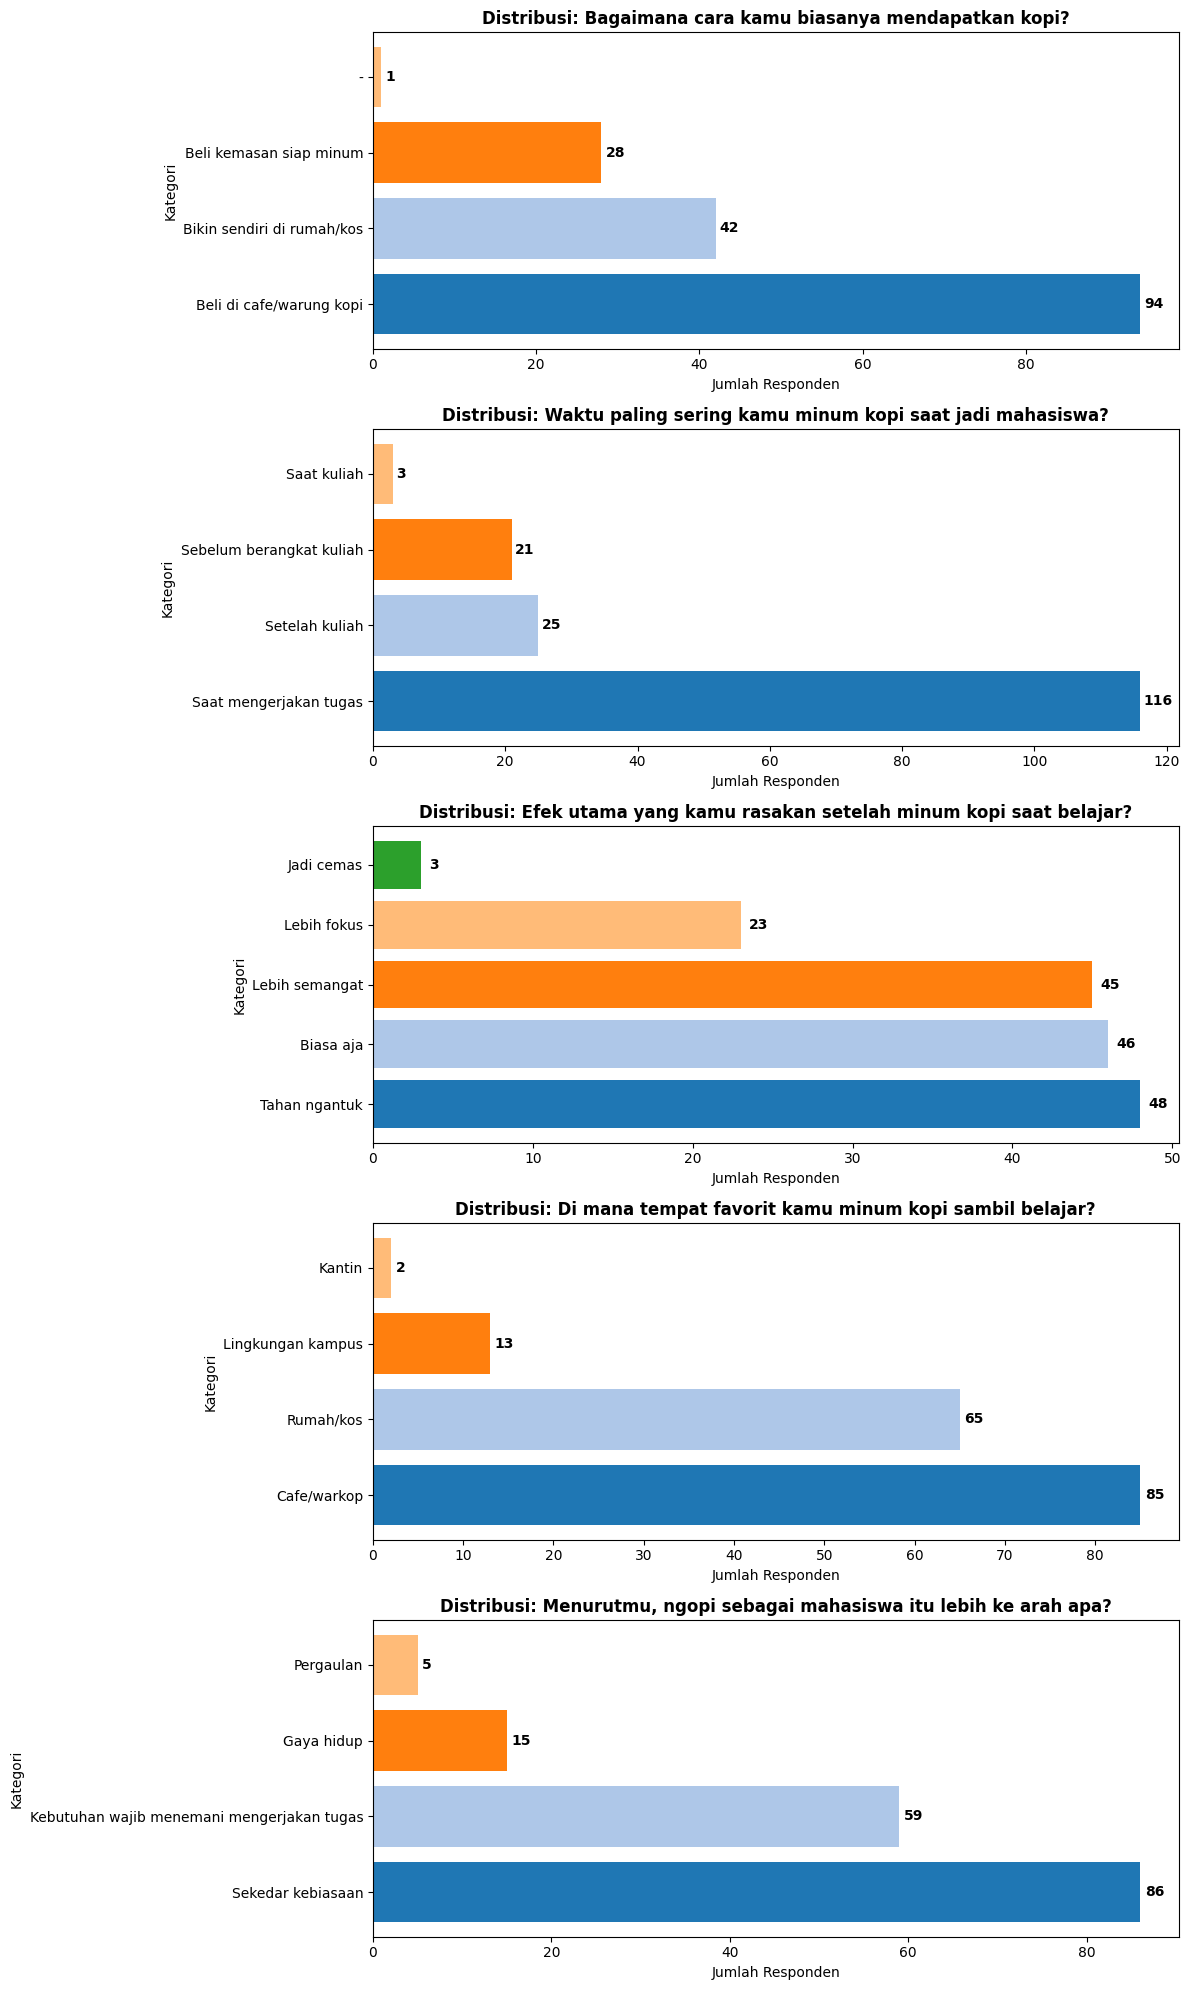

In [ ]:
cols_kategorikal = [
    "Bagaimana cara kamu biasanya mendapatkan kopi?",
    "Waktu paling sering kamu minum kopi saat jadi mahasiswa?",
    "Efek utama yang kamu rasakan setelah minum kopi saat belajar?",
    "Di mana tempat favorit kamu minum kopi sambil belajar?",
    "Menurutmu, ngopi sebagai mahasiswa itu lebih ke arah apa?"
]

fig, axes = plt.subplots(nrows=len(cols_kategorikal), ncols=1, figsize=(12, 4 * len(cols_kategorikal)))

if len(cols_kategorikal) == 1:
    axes = [axes]

for ax, col in zip(axes, cols_kategorikal):
    counts = df_cleaned[col].value_counts().sort_values(ascending=False)

    bars = ax.barh(counts.index, counts.values, color=plt.cm.tab20(range(len(counts))))

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)),
                va='center', fontsize=10, fontweight='bold')

    ax.set_title(f"Distribusi: {col}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Jumlah Responden")
    ax.set_ylabel("Kategori")

plt.tight_layout()
plt.show()

In [ ]:
# Simpan ke file CSV
df_cleaned.to_csv("dataset_EDA_cleaned.csv", index=False)

from google.colab import files
files.download("dataset_EDA_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>